In [4]:
# import tensorflow as tf

import os
import pathlib
import time
import datetime

from matplotlib import pyplot as plt
from IPython import display
import math

In [2]:
dataset_name = 'facades'

In [3]:
# url = f'http://efrosgans.eecs.berkeley.edu/pix2pix/datasets/{dataset_name}.tar.gz'

# path_to_zip = tf.keras.utils.get_file(
#     fname=f'{dataset_name}.tar.gz',
#     origin=url,
#     extract=True
# )

In [4]:
# path_to_zip = pathlib.Path(path_to_zip)
# path = path_to_zip.parent/dataset_name

In [5]:
# frames = tf.data.Dataset.list_files('C:/Users/anang/OneDrive/Desktop/YNR/coffee shop/*')
# labels = tf.data.Dataset.list_files('C:/Users/anang/OneDrive/Desktop/YNR/empty coffee shop/*')

In [ ]:
"""
acquire both folders
extract the data from the image folders.
pair images in image folders to the audio in audio folders.
convert audio data into image data
-divide the images by the number of audio files corresponding to each image folder
if numbder is equal to the dividend move
if number - number is equal to
"""

In [5]:
image_folders = os.listdir('sound images')
sound_folders = os.listdir('audio')

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'sound images'

In [2]:
for fold in image_folders:
    images = os.listdir(os.path.join('sound images', fold))
    print(len(images))

NameError: name 'image_folders' is not defined

In [ ]:
def load_and_preprocess_data():
    data = []
    labels = []
    num = 0
    

    audio_data, sample_rate = librosa.load()
    mel_spectrogram = librosa.feature.melspectrogram(y=audio_data, sr=sample_rate)
    mel_spectrogram = tf.resize(np.expand_dims(mel_spectrogram))
    
    data.append(mel_spectrogram)
    
    return np.array(data), np.array(label)

In [6]:
#THIS IS A LOAD IMAGE FUNCTION WHICH LOADS THE IMAGES FROM THE DATASET AND SPLITS THEM INTO REAL AND INPUT IMAGE

def load(image_file):
  image = tf.io.read_file(image_file)
  image = tf.io.decode_jpeg(image)


  w = tf.shape(image)[1]
  w = w // 2
  input_image = image[:, w:, :]
  real_image = image[:, :w, :]

  # plt.imshoow(input_image)

  input_image = tf.cast(input_image, tf.float32)
  real_image = tf.cast(real_image, tf.float32)

  print(input_image)

  return input_image, real_image


In [7]:
# The facade training set consist of 400 images
BUFFER_SIZE = 400
# The batch size of 1 produced better results for the U-Net in the original pix2pix experiment
BATCH_SIZE = 1
# Each image is 256x256 in size
IMG_WIDTH = 256
IMG_HEIGHT = 256
OUTPUTCHANNEL = 3

In [8]:
def load_and_preprocess_image(image_file):
    # Load the image from the file path
    image = tf.io.read_file(image_file)
    # Decode the image (e.g., JPEG or PNG)
    image = tf.image.decode_jpeg(image, channels=3)
    # Resize the image to your desired dimensions
    image = tf.image.resize(image, [IMG_WIDTH, IMG_HEIGHT])
    # Normalize pixel values (optional)
    image = (image / 127.5) - 1

    # image = random_crop(image)
    
    # image = tf.image.random_flip_left_right(image)
    return image

In [9]:
#THIS IS A FUNCTION WHICH RESIZES THE IMAGES TO FIT THE INPUT OF THE MODEL

def resize(input_image, real_image, height, width):
  input_image = tf.image.resize(input_image, [height, width], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
  real_image = tf.image.resize(real_image, [height, width], method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)

  return input_image, real_image


In [10]:
#FOR DIVERSITY, THE IMAGES ARE STACKED AND RANDOMLY CROPPED THE SMAE WAY
def random_crop(input_image, real_image):
  stacked_image = tf.stack([input_image, real_image], axis=0)
  cropped_image = tf.image.random_crop(stacked_image, size=[2, IMG_WIDTH, IMG_HEIGHT, 3])

  print(cropped_image[0])

  return cropped_image[0], cropped_image[1]

In [11]:
#THE IMAGES ARE NORMALIZED TO HAVE VALUES BETWEEN -1 AND 1 INSTEAD OF 0 AND 255 TO REDUCE COMPUTATIONAL COMPLEXITY
def normalize(input_image, real_image):
  input_image = (input_image / 127.5) - 1
  real_image = (real_image / 127.5) - 1

  return input_image, real_image

In [12]:
#THIS IS WHERE ALL OF THE FUNCTIONS ARE PERFORMED ON THE IMAGE
def random_jitter(input_image, real_image):
  input_image, real_image = resize(input_image, real_image, 286, 286)

  # input_image, real_image = random_crop(input_image, real_image)

  if tf.random.uniform(()) > 0.5:
    # Random mirroring
    input_image = tf.image.flip_left_right(input_image)
    real_image = tf.image.flip_left_right(real_image)

  return input_image, real_image

In [13]:
#IN THIS FUNCTION THE TRAINING IMAGES ARE LOADED AND PREPROCESSDE FOR TRAINING
def load_image_train(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = random_jitter(input_image, real_image)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image

In [14]:
def load_image_test(image_file):
  input_image, real_image = load(image_file)
  input_image, real_image = resize(input_image, real_image,
                                   IMG_HEIGHT, IMG_WIDTH)
  input_image, real_image = normalize(input_image, real_image)

  return input_image, real_image

In [15]:
#THE TRAINING DATASET IS CREATED IN THIS FUNCTION
frames = tf.data.Dataset.list_files('C:/Users/anang/OneDrive/Desktop/Tora/frames/*', shuffle=False)
frames = frames.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
frames = frames.batch(BATCH_SIZE)

In [16]:
labels = tf.data.Dataset.list_files('C:/Users/anang/OneDrive/Desktop/Tora/labels/*', shuffle=False)
labels = labels.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
labels = labels.batch(BATCH_SIZE)

In [17]:
test_frames = tf.data.Dataset.list_files('C:/Users/anang/OneDrive/Desktop/Tora/test_frames/*', shuffle=False)
test_frames = test_frames.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
test_frames = test_frames.batch(BATCH_SIZE)

In [18]:
test_labels = tf.data.Dataset.list_files('C:/Users/anang/OneDrive/Desktop/Tora/test_labels/*', shuffle=False)
test_labels = test_labels.map(load_and_preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)
test_labels = test_labels.batch(BATCH_SIZE)

In [19]:
test_dataset = tf.data.Dataset.zip((test_frames, test_labels))

In [20]:
train_dataset = tf.data.Dataset.zip((frames, labels))

In [21]:
OUTPUT_CHANNELS = 3

In [22]:
#THIS IS THE DOWNSAMPLING LAYER RESPONSIBLE FOR EXTRACTING FEATURES IN THE IMAGE BY PERFORMING A POOLING-LIKE OPERATION ON THE IMAGE

def down_sample(filters, size, apply_batch_norm=True):
  initializer = tf.random_normal_initializer(0., 0.02)

  #images are sent into a conv layer
  result = tf.keras.Sequential()
  result.add(tf.keras.layers.Conv2D(filters, size, 1, kernel_initializer=initializer, padding='same', use_bias=False))

  #batch normalization is applied
  if apply_batch_norm:
    result.add(tf.keras.layers.BatchNormalization())

  #leaky relu activation function is applied as well
  result.add(tf.keras.layers.LeakyReLU())

  return result


In [23]:
#UP_SAMPLING LAYER IS RESPONSIBLE FOR CONVERTING THE IMAGE SLOWLY BACK INTO ITS INTERPRETED ORIGINAL SIZE
def up_sample(filters, size, apply_drop=False):
  initializer = tf.random_normal_initializer(0., 0.02)

  result = tf.keras.Sequential()
  result.add(tf.keras.layers.Conv2D(filters, size, 1, kernel_initializer=initializer, padding='same', use_bias=False))

  if apply_drop:
    result.add(tf.keras.layers.Dropout(0.5))

  result.add(tf.keras.layers.ReLU())

  return result


In [24]:
def Generator():
    input = tf.keras.layers.Input(shape=[256, 256, 3])
    
    down_stack = [
      down_sample(64, 4, apply_batch_norm=False),
      down_sample(128, 4),
      down_sample(256, 4),
      down_sample(512, 4),
    ]
    
    up_stack = [
      up_sample(256, 4, apply_drop=True),
      up_sample(128, 4),
      up_sample(64, 4),
    ]
    
    
    initializer = tf.random_normal_initializer(0., 0.02)
    last = tf.keras.layers.Conv2DTranspose(OUTPUTCHANNEL, 4, padding='same', kernel_initializer=initializer, activation='tanh')
    
    x = input
    #downsampling through the model
    skips = []
    for down in down_stack:
    
        x = down(x)
        skips.append(x)
    
    skips = reversed(skips[:-1])
    
    #upsampling and skip connections
    
    print(skips)
    
    for up, skip in zip(up_stack, skips):
        x = up(x)
        x = tf.keras.layers.Concatenate()([x, skip])
    
    
    
    
    x = last(x)
    
    return tf.keras.Model(inputs=input, outputs=x)

In [25]:
generator = Generator()

In [26]:
LAMBDA = 100

loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)

  # Mean absolute error
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))

  total_gen_loss = gan_loss + (LAMBDA * l1_loss)

  return total_gen_loss, gan_loss, l1_loss

In [27]:
def Discriminator():
  initializer= tf.random_normal_initializer(0., 0.02)

  input_image = tf.keras.layers.Input(shape=[256, 256, 3])
  tar_image = tf.keras.layers.Input(shape=[256, 256, 3])

  x = tf.keras.layers.concatenate([input_image, tar_image])

  down = down_sample(64, 4)(x)
  down = down_sample(128, 4)(down)
  down = down_sample(256, 4)(down)

  pad = tf.keras.layers.ZeroPadding2D()(down)
  conv = tf.keras.layers.Conv2D(512, strides=1, kernel_size=(4,4), kernel_initializer=initializer, use_bias=False)(pad)

  batch_norm = tf.keras.layers.BatchNormalization()(conv)
  leaky = tf.keras.layers.LeakyReLU()(batch_norm)

  pad = tf.keras.layers.ZeroPadding2D()(leaky)

  last = tf.keras.layers.Conv2D(1, 4, strides=1, kernel_initializer=initializer)(pad)

  return tf.keras.Model(inputs=[input_image, tar_image], outputs=last)



In [28]:
discriminator = Discriminator()

In [29]:
def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)

  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)

  total_loss = real_loss + generated_loss

  return total_loss


In [30]:
generator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4, beta_1=0.5)

In [31]:
def generate_images(model, test_input, tar):
  img = model(test_input, training=True)

  plt.figure(figsize=(15, 15))

  display_list = [test_input[0], tar[0], img[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']

  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    # Getting the pixel values in the [0, 1] range to plot.
    plt.imshow(display_list[i] * 0.5 + 0.5)
    plt.axis('off')
  plt.show()

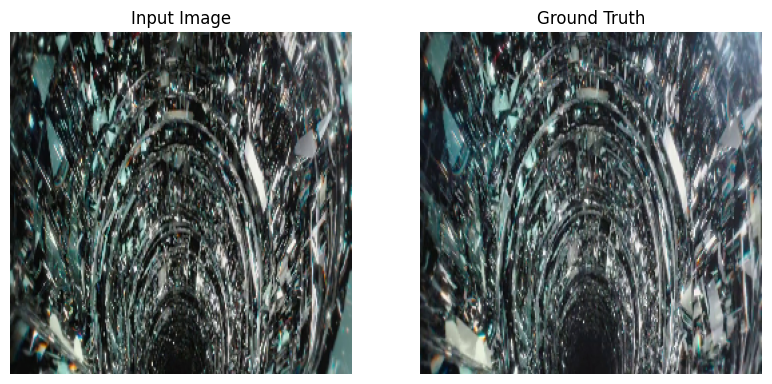

In [32]:
for input, tar in train_dataset.take(1):
    plt.figure(figsize=(15, 15))

    display_list = [input[0], tar[0]]
    title = ['Input Image', 'Ground Truth']
    
    for i in range(2):
        plt.subplot(1, 3, i+1)
        plt.title(title[i])
        # Getting the pixel values in the [0, 1] range to plot.
        plt.imshow(display_list[i] * 0.5 + 0.5)
        plt.axis('off')
    plt.show()
  # generate_images(generator, input, tar)

In [33]:
log_dir="logs/"

summary_writer = tf.summary.create_file_writer(
  log_dir + "fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

In [34]:
def train_step(input_image, target_image, step):
  with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
    gen_outputs = generator(input_image, training=True)

    disc_real_output = discriminator([input_image, target_image], training=True)
    disc_gen_output = discriminator([input_image, gen_outputs], training=True)

    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_gen_output, gen_outputs, target_image)
    disc_loss = discriminator_loss(disc_real_output, disc_gen_output)

  generator_gradients = gen_tape.gradient(gen_total_loss, generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

  generator_optimizer.apply_gradients(zip(generator_gradients, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients, discriminator.trainable_variables))

  with summary_writer.as_default():
    tf.summary.scalar('gen_total_loss', gen_total_loss, step=step//1000)
    tf.summary.scalar('gen_gan_loss', gen_gan_loss, step=step//1000)
    tf.summary.scalar('gen_l1_loss', gen_l1_loss, step=step//1000)
    tf.summary.scalar('disc_loss', disc_loss, step=step//1000)

In [35]:
def fit(train_ds, test_ds, steps):
  example_input, example_target = next(iter(test_ds.take(1)))
  start = time.time()

  for step, (input_image, target) in train_ds.repeat().take(steps).enumerate():
    if (step) % 1000 == 0:
      display.clear_output(wait=True)

      if step != 0:
        print(f'Time taken for 1000 steps: {time.time()-start:.2f} sec\n')

      start = time.time()

      
      print(f"Step: {step//1000}k")

    train_step(input_image, target, step)
    print('.', end='', flush=True)

    # Training step
    if (step+1) % 10 == 0:
        generate_images(generator, example_input, example_target)
        print('.', end='', flush=True)

Time taken for 1000 steps: 348696.09 sec

Step: 1k
..........

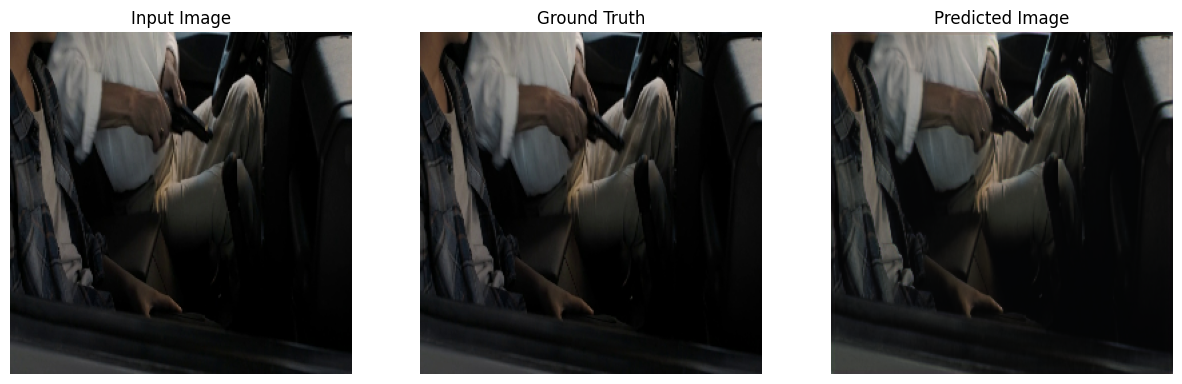

...........

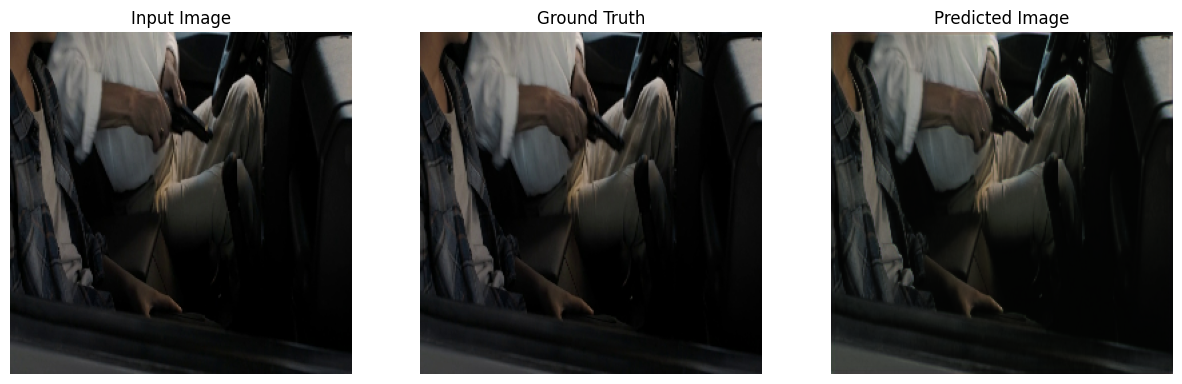

...........

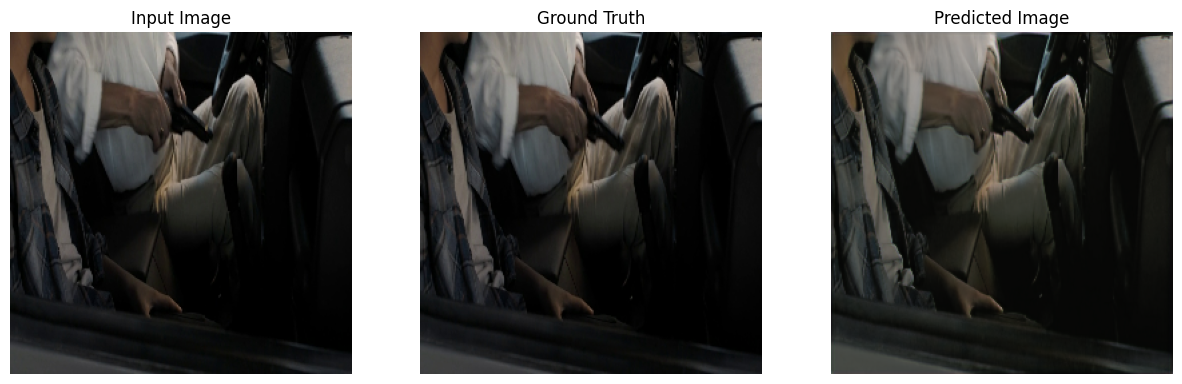

...........

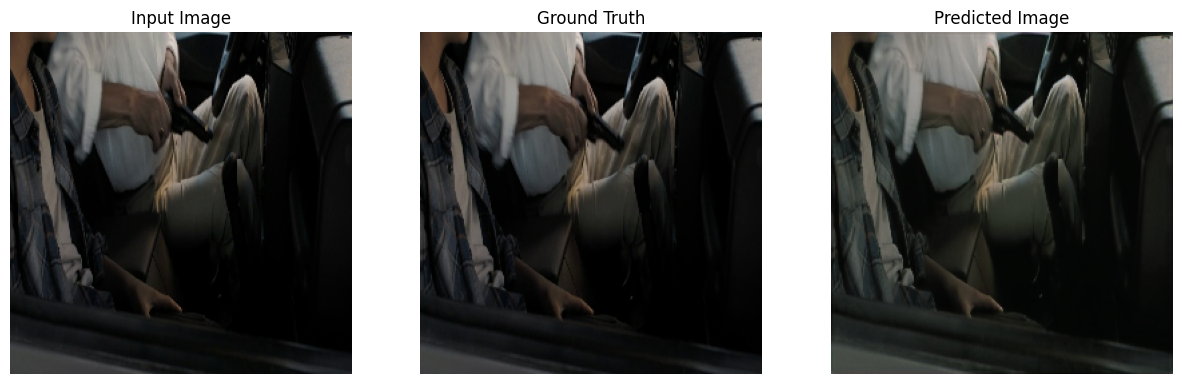

...........

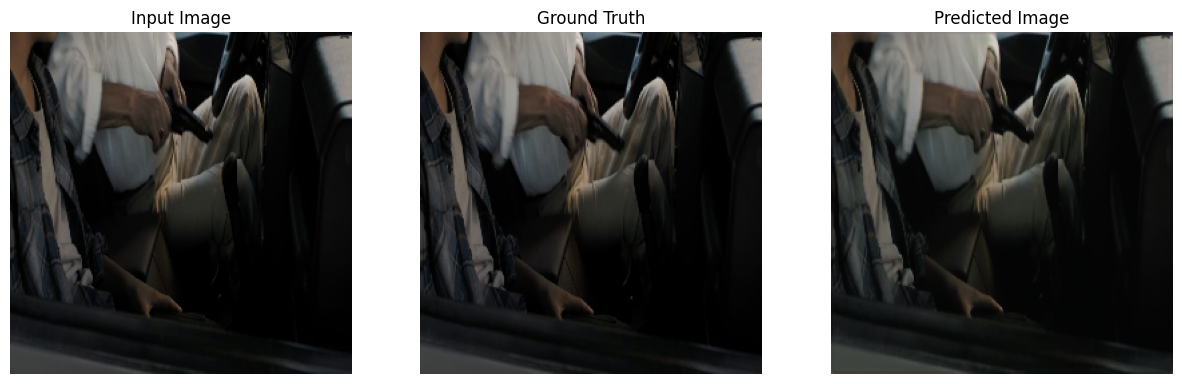

...........

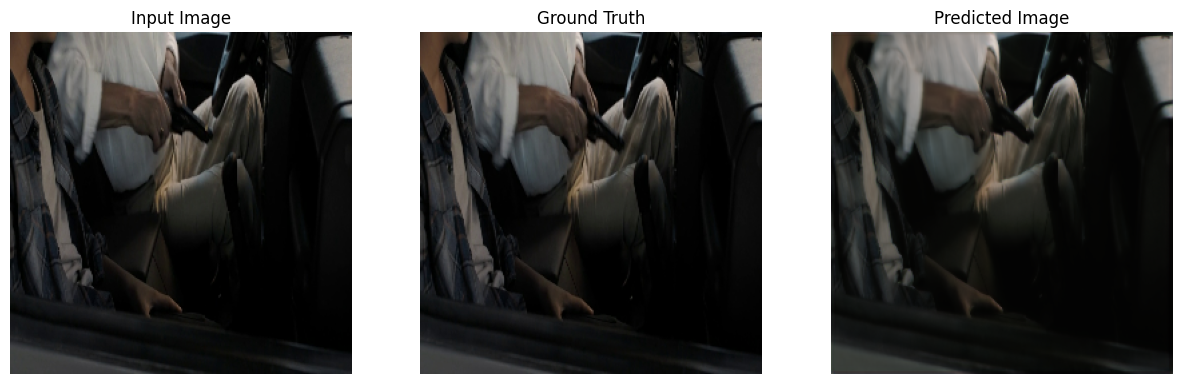

...........

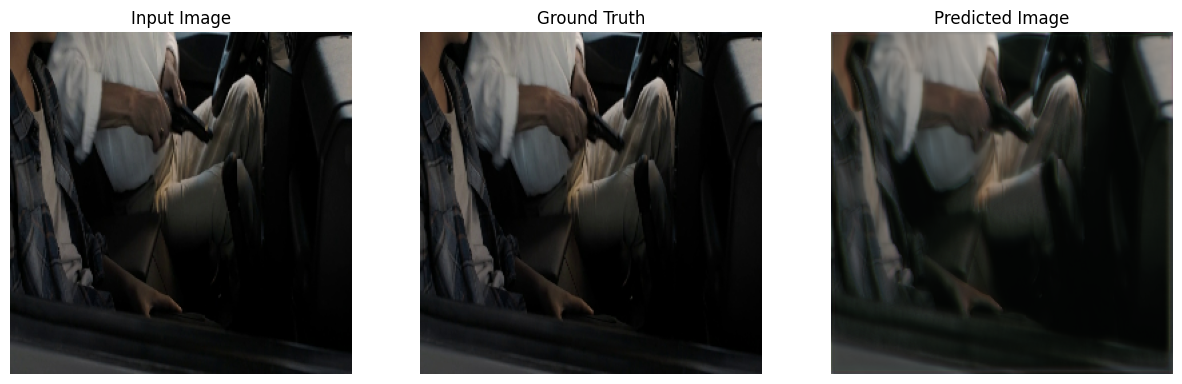

...........

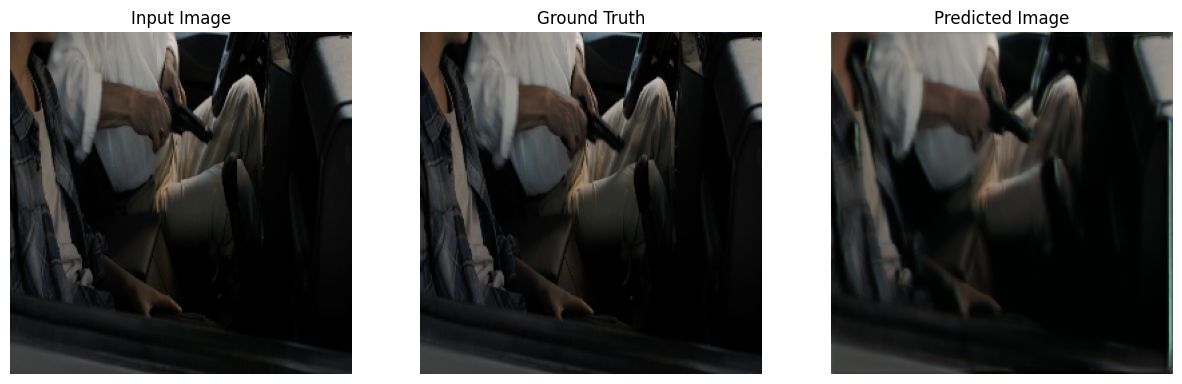

...........

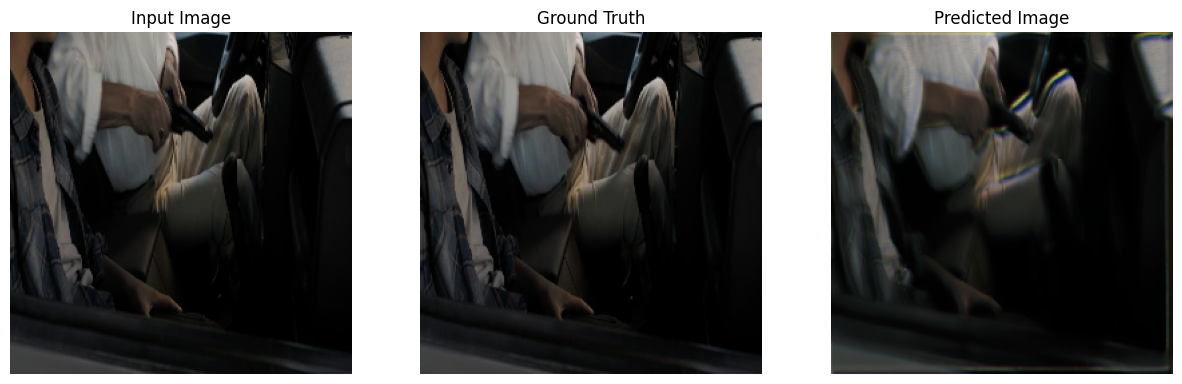

...........

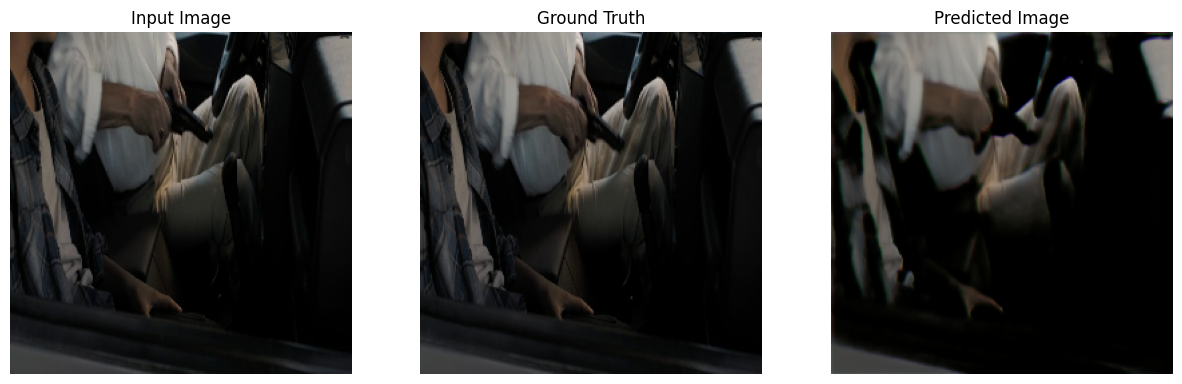

...........

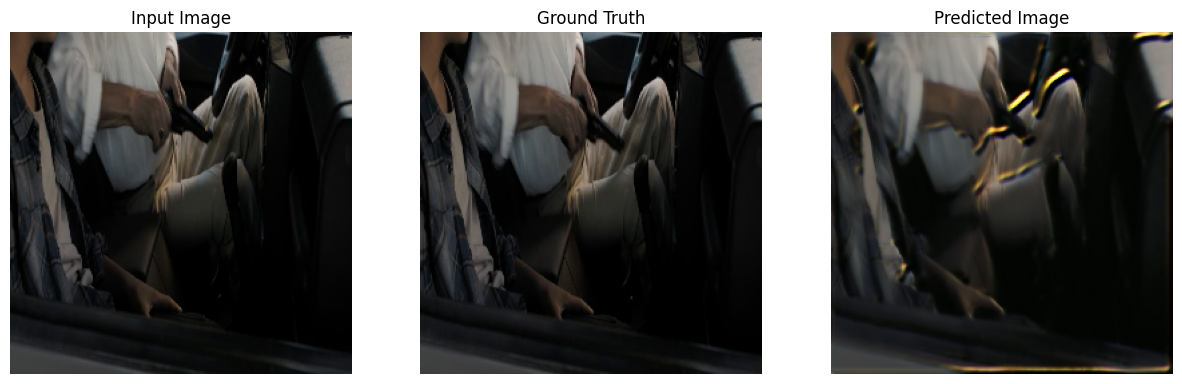

...........

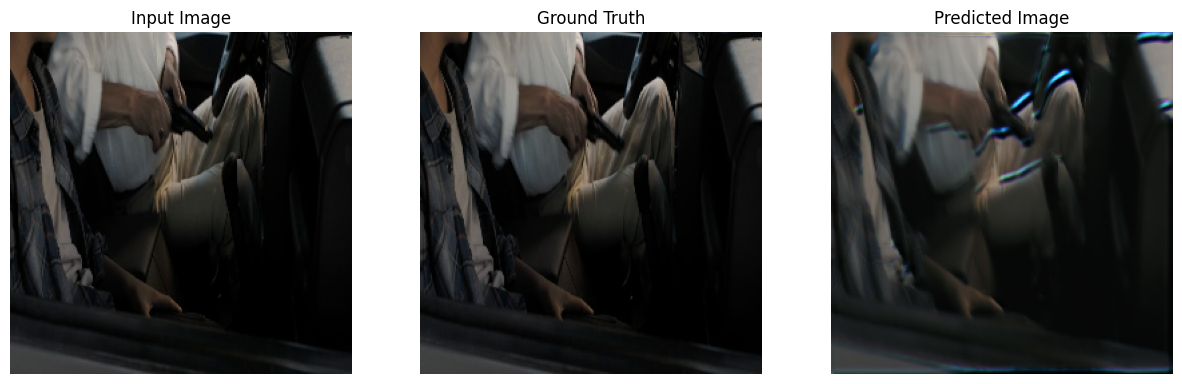

...........

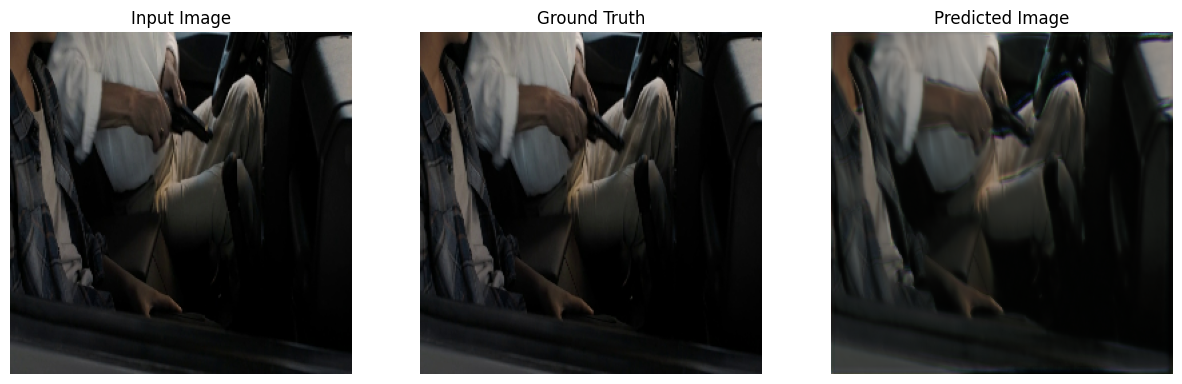

...........

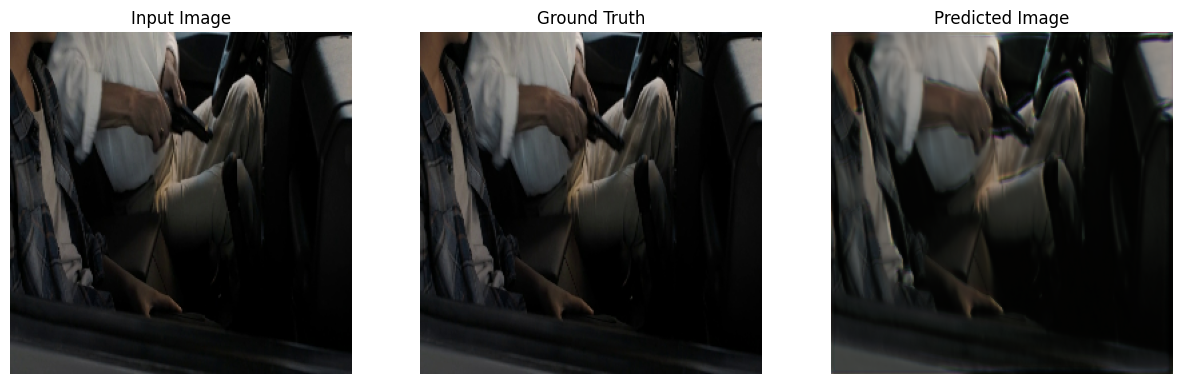

...........

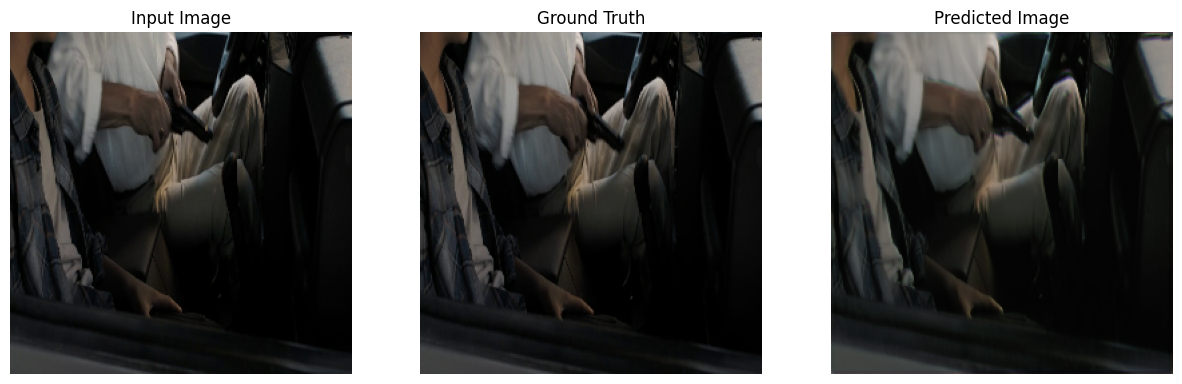

...........

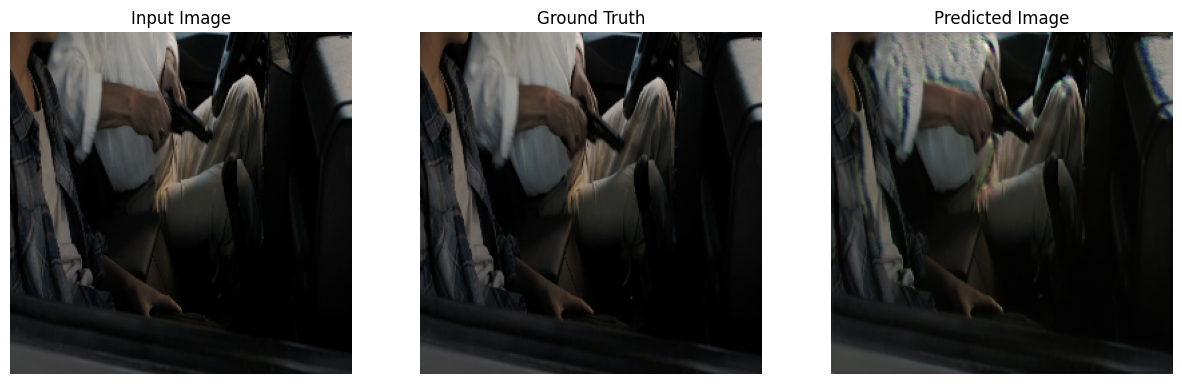

...........

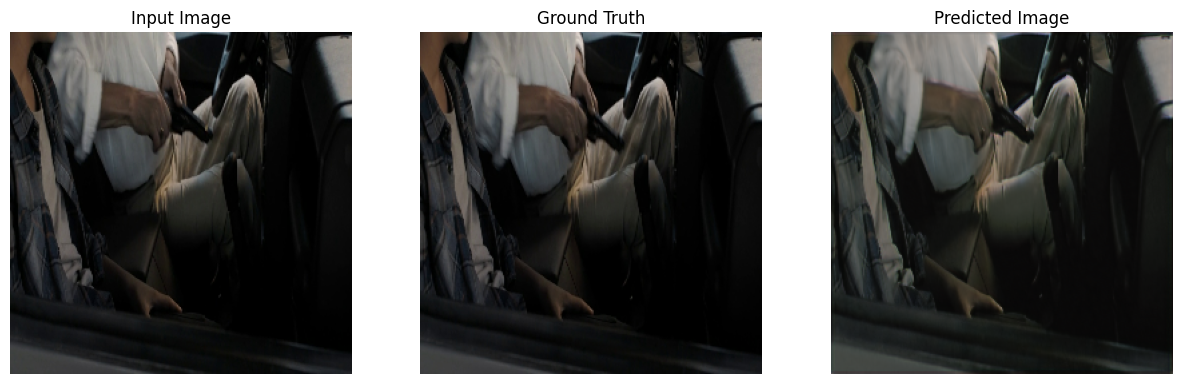

.....

In [ ]:
fit(train_dataset, test_dataset, steps=4000)